In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from numpy import random

## Using LinearRegression

In [36]:
from sklearn.datasets import load_boston
boston = load_boston()

In [37]:
print(boston.data.shape)

(506, 13)


In [38]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [39]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [40]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [41]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [42]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

ss= StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


mean squared error = 28.53045876597462


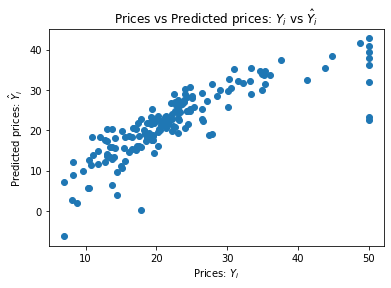

In [44]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

MSE_lr=mean_squared_error(Y_test,Y_pred)
print('mean squared error =',MSE_lr)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

## Using manual SGD

In [28]:
X = load_boston().data
Y = load_boston().target

In [29]:
import sklearn
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

ss= StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [30]:
tr_data=pd.DataFrame(X_train)
tr_data['price']=Y_train
tr_data['price']=tr_data['price'].fillna(tr_data['price'].mean())
tr_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.911839,-0.502419,1.072305,-0.256978,1.633548,0.486034,0.962774,-0.823477,1.655334,1.552100,0.808078,-2.842959,1.523203,13.4
1,-0.411727,-0.502419,-1.129795,-0.256978,-0.552451,1.028078,0.668619,-0.183274,-0.871371,-0.802704,-0.304174,0.427436,-0.995240,23.6
2,0.124583,-0.502419,1.072305,-0.256978,1.441946,-3.913414,0.725324,-1.075955,1.655334,1.552100,0.808078,-0.053353,-0.765646,27.5
3,-0.406208,0.839388,-0.901940,-0.256978,-1.083710,0.097426,-0.515087,1.600509,-0.411970,-0.624310,-0.860301,0.152292,-0.184576,22.2
4,0.021742,-0.502419,1.072305,-0.256978,1.398401,0.123238,0.743044,-0.605107,1.655334,1.552100,0.808078,0.365116,0.301538,17.7


In [31]:
def SGD_New(tr_data,learning_rate,n_iter,k,divideby):
    
    w=np.zeros(shape=(1,tr_data.shape[1]-1))
    b=0
    
    cur_iter=1
    while(cur_iter<=n_iter): 
        sam=tr_data.sample(k)

        y=np.array(sam['price'])
        x=np.array(sam.drop('price',axis=1))
        
        w_grad=np.zeros(shape=(1,tr_data.shape[1]-1))
        b_grad=0
        
        for i in range(k): 
            prediction=np.dot(w,x[i])+b
            w_grad=w_grad+(-2)*x[i]*(y[i]-(prediction))
            b_grad=b_grad+(-2)*(y[i]-(prediction))
      
        w=w-learning_rate*(w_grad/k)
        b=b-learning_rate*(b_grad/k)

        #print("W={},B={}".format(w,b))
        cur_iter=cur_iter+1
        
        learning_rate=learning_rate/divideby
        
    return w,b 


In [32]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [33]:
w,b=SGD_New(tr_data,learning_rate=0.01,n_iter=1000,k=25,divideby=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


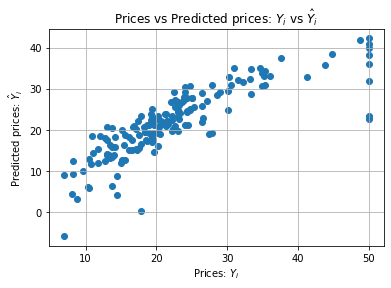

Mean Squared Error : 26.404284384283347


In [34]:
from sklearn.metrics import mean_squared_error

y_pred_SGD_New=predict(X_test,w,b)

plt.scatter(Y_test,y_pred_SGD_New)
plt.grid()
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

print('Mean Squared Error :',mean_squared_error(Y_test, y_pred_SGD_New))

## Using SGDRegressor

mean squared error = 28.402977935440205


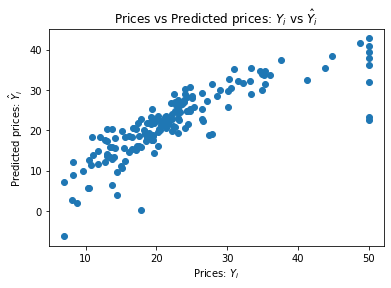

In [46]:
from sklearn.linear_model import SGDRegressor

sgr = SGDRegressor()
sgr.fit(X_train, Y_train)

Y_pred_sgr = sgr.predict(X_test)

MSE_sgr=mean_squared_error(Y_test,Y_pred_sgr)
print('mean squared error =',MSE_sgr)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

## Comparison between weights obtained from manual implementation and from SGDRegressor implementation

In [49]:
from prettytable import PrettyTable    

x = PrettyTable()
x.field_names=['manual','SGDRegressor']
weights_sgd=sgr.coef_
for i in range(13):
    x.add_row([w[0][i],weights_sgd[i]])
print(x)


+---------------------+----------------------+
|        manual       |     SGDRegressor     |
+---------------------+----------------------+
| -1.2023284122896896 | -1.2170149038283884  |
|  0.805681935652407  |  0.7395677394532904  |
| -0.2730172373204223 | -0.4604010300474088  |
| 0.10640505424740974 |  0.2408235833213233  |
|  -1.335308370794544 | -1.2964462772461627  |
|  2.9118341361774847 |  2.8634244029098146  |
| -0.4132683096555612 | -0.37996537263447844 |
|  -2.80279222556032  |  -2.727494160002881  |
|  2.147599654814912  |  1.891182569130873   |
| -1.2757249836305415 | -1.1037758435889433  |
|  -2.145138461513425 |   -2.0871717583008   |
|  1.0343812512764128 |  1.025426035856688   |
| -3.3777552636886807 | -3.3055764857368346  |
+---------------------+----------------------+


## Performance Table

In [53]:
x = PrettyTable()

x.field_names = ["S.NO.", "Model",  "MSE"]
x.add_row(["1", "LinearRegressor", "28.54"])
x.add_row(["2", "Manual SGD", "26.40"])
x.add_row(["3", "Sklearn SGDRegressor","28.40"])

print(x)

+-------+----------------------+-------+
| S.NO. |        Model         |  MSE  |
+-------+----------------------+-------+
|   1   |   LinearRegressor    | 28.54 |
|   2   |      Manual SGD      | 26.40 |
|   3   | Sklearn SGDRegressor | 28.40 |
+-------+----------------------+-------+


### Steps performed :
- Import the dataset from sklearn.datasets.
- Split the dataset into Train and Test with test_size 0.33 .
- Applied LinearRegressor and calculated MSE.
- Plotted actual prices vs predicted prices for LinearRegressor.
- Applied SGD manually with learning rate=0.01, iteration=1000 and sample size=25.
- Calculated MSE and plotted actual prices vs predicted prices for manual SGD.
- Applied SkLearn's SGDRegressor, calculated MSE and plotted  prices vs predicted prices.
- Compared weights obtained from manual implementation and from SGDRegressor implementation.
